<a href="https://colab.research.google.com/github/carolpascott/Machine-Learning/blob/artigo/Redes_Neurais_MLP_%7C_MPU_6050.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
from keras.models import Sequential
from keras.layers import Dense
from ann_visualizer.visualize import ann_viz

Abrir arquivos que já foram analisados e tratados

In [ ]:
filename = "vent_ok"
filename1 = "vent_nok"

ext = ".csv"
header = ['aX','aY','aZ','gX','gY','gZ']
drive.mount('/content/drive', force_remount=True)

In [ ]:
vent_ok = pd.read_csv("/content/drive/MyDrive/dados_mpu6050/" + filename + ext).iloc[:25800,:]
vent_nok = pd.read_csv("/content/drive/MyDrive/dados_mpu6050/" + filename1 + ext).iloc[:25800,:]

# Gráficos Dados Brutos

In [ ]:
#grafico dados brutos
df = vent_ok 
df1 = vent_nok

df            #visualizar o começo e final do dataframe

In [ ]:
index = range(1, len(df['aX']) + 1)
plt.rcParams["figure.figsize"] = (25,10)

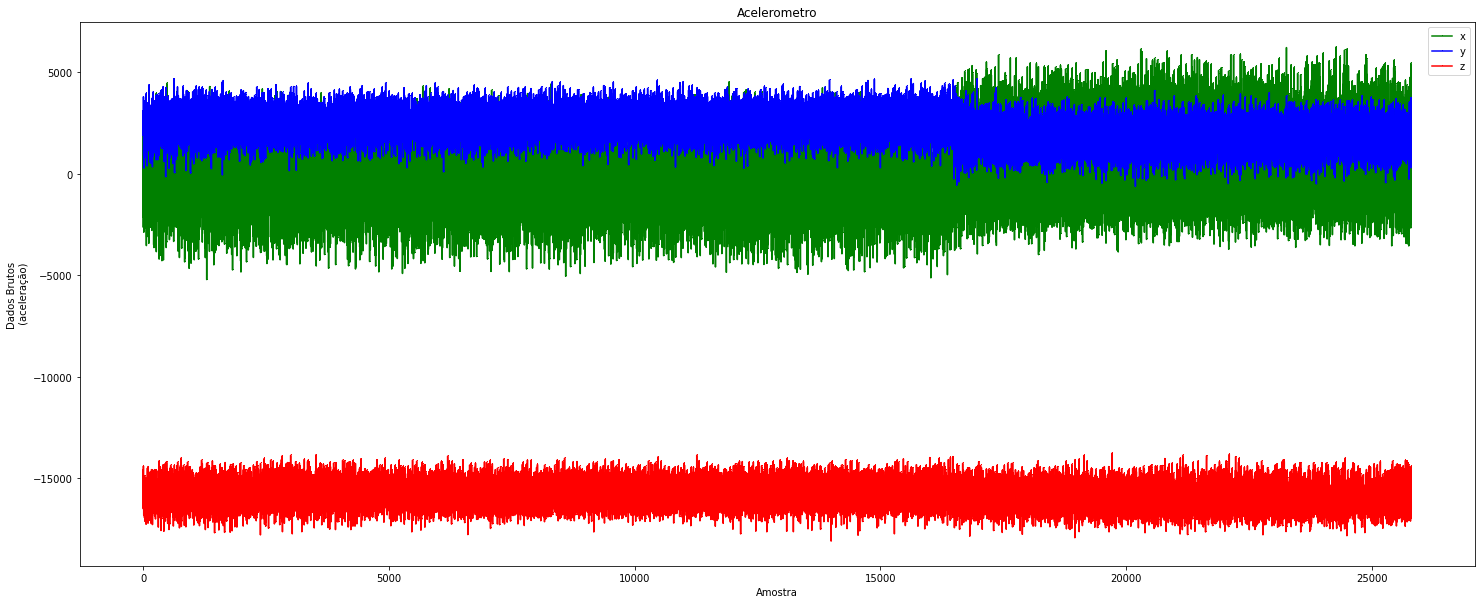

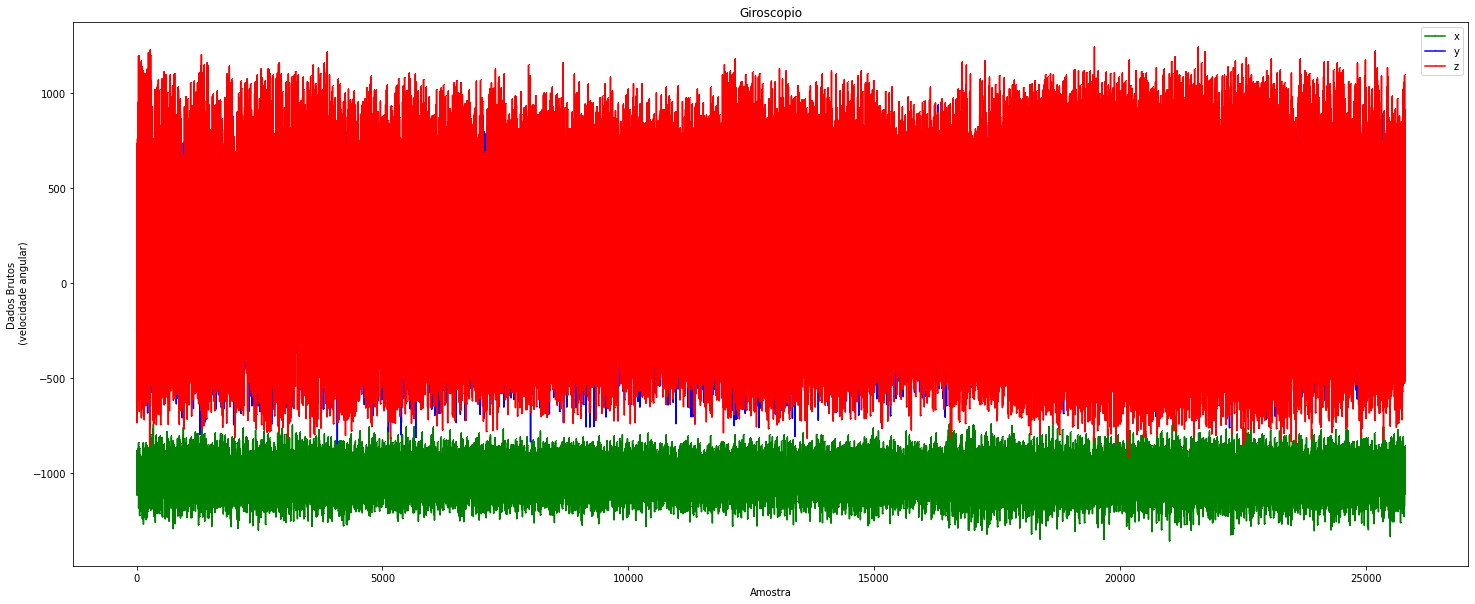

In [ ]:
#acel ok
plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acelerometro")
plt.xlabel("Amostra")
plt.ylabel("Dados Brutos\n (aceleração)")
plt.legend()
plt.show()

#giro ok
plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Giroscopio")
plt.xlabel("Amostra")
plt.ylabel("Dados Brutos\n (velocidade angular)")
plt.legend()
plt.show()

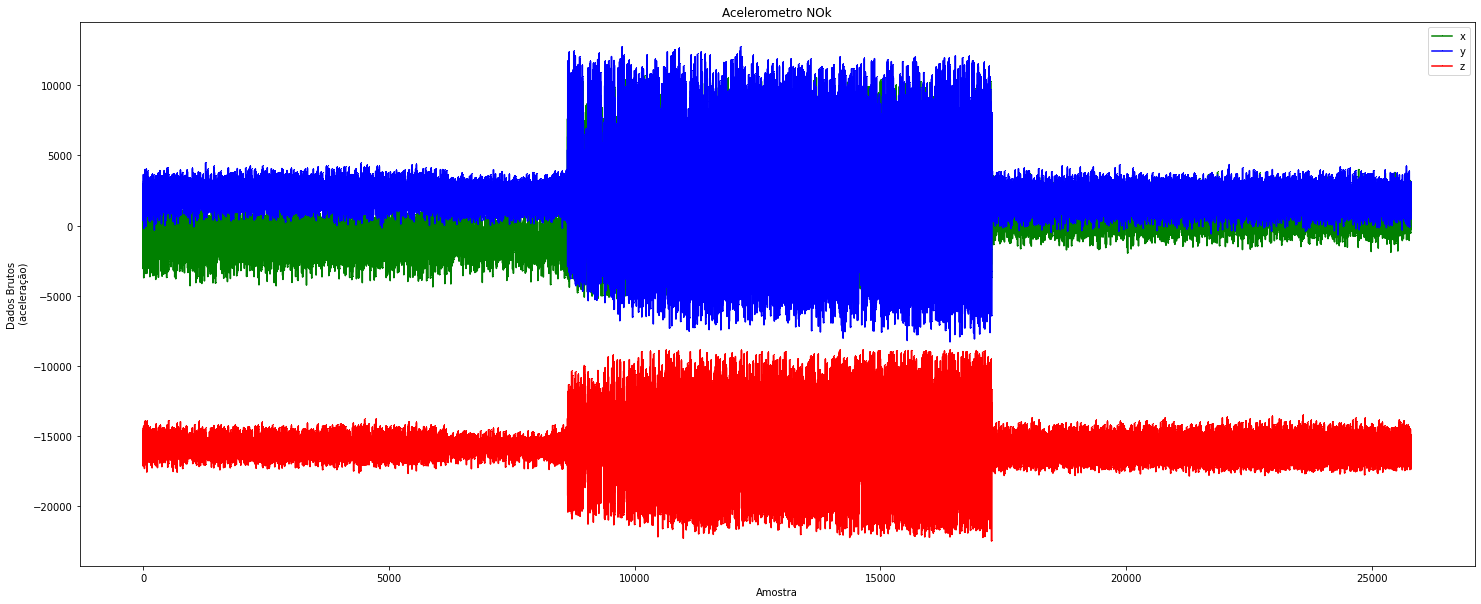

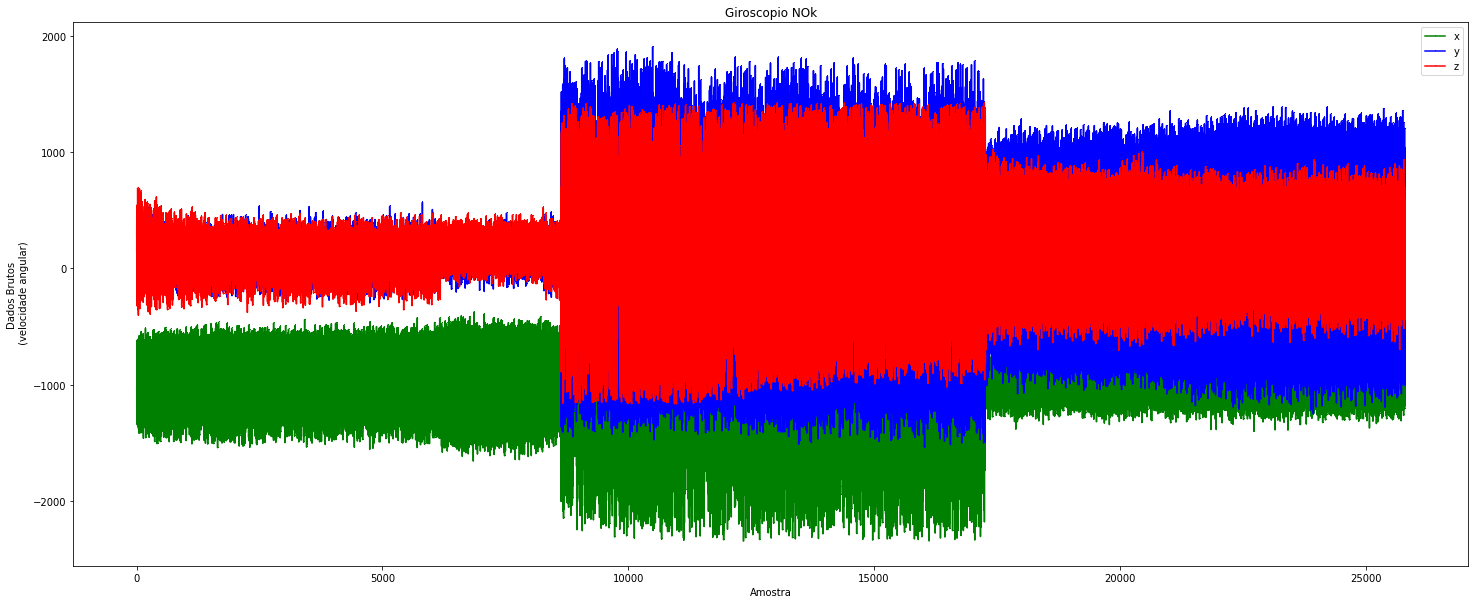

In [ ]:
#acel nok
plt.plot(index, df1['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df1['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df1['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acelerometro NOk")
plt.xlabel("Amostra")
plt.ylabel("Dados Brutos\n (aceleração)")
plt.legend()
plt.show()

#giro nok
plt.plot(index, df1['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df1['gY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df1['gZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Giroscopio NOk")
plt.xlabel("Amostra")
plt.ylabel("Dados Brutos\n (velocidade angular)")
plt.legend()
plt.show()

# Treinamento da Rede Neural





In [ ]:
#nome arquitetura
n_model = '1-model'

In [ ]:
#inclui os dois dataframe em vent
vent_ok['status'] = 0
vent_nok['status'] = 1

vent = vent_ok.append(vent_nok, ignore_index=True)

In [ ]:
#X = entrada
#y = saida
X = vent.iloc[:,0:6]  #acel e giro
y = np.ravel(vent.status) #saída [0(ok) ou 1(nok)]

In [ ]:
#separa 1/3 para testar a rede posteriormente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Normaliza os dados entre -1 e +1
# Analisa os dados e prepara o padronizador
scaler = MaxAbsScaler().fit(X_train)

# Transforma os dados
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#multi layer percepton

model = Sequential()
model.add(Dense(9, activation='relu', input_shape=(6,)))
#model.add(Dense(5, activation='relu'))
#model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='ADAM',  # SGD ADAM RMSprop
              metrics=['accuracy'])

In [ ]:
#treinamento da rede
history = model.fit(X_train, y_train,epochs=150, batch_size=50, validation_data=(X_test, y_test), verbose=1)

In [ ]:
#salvar a saida de acordo com a função de otimização SGD, Adam ou RMSprop
#SGD
model_sgd = model
history_sgd = history

In [ ]:
#Adam
model_adam = model
history_adam = history

In [ ]:
#RMSprop
model_rmsprop = model
history_rmsprop = history

In [ ]:
#avaliar o modelo
loss, accuracy = model.evaluate(X_test, y_test)

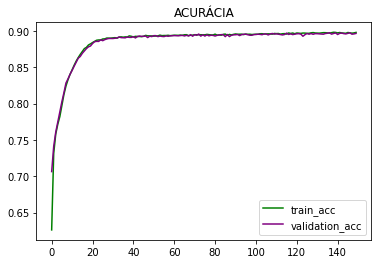

In [ ]:
y_lim = (0.3, 0.8)
plt.title('ACURÁCIA')
plt.plot(history.history['accuracy'], label='train_acc',color='green')
plt.plot(history.history['val_accuracy'], label='validation_acc',color='purple')
#plt.ylim(y_lim)
plt.legend()
plt.show()

previsões =
 [[0.873]
 [1.   ]
 [0.016]
 ...
 [0.092]
 [0.187]
 [0.119]]
atual =
 [1 1 0 ... 0 0 0]


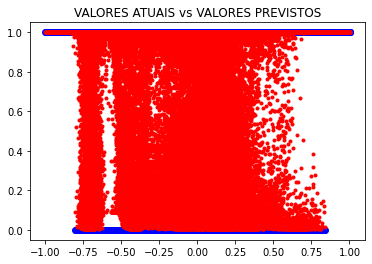

In [ ]:
#modelo para prever os dados de testes
predictions = model.predict(X_test)

#valores previstos x valores atuais
print("previsões =\n", np.round(predictions, decimals=3))
print("atual =\n", y_test)


#valores previstos com os dados de teste
plt.title('VALORES ATUAIS vs VALORES PREVISTOS')
plt.plot(X_test, y_test, 'b.', label='Atual', marker='o')
plt.plot(X_test, predictions, 'r.', label='Previsto', marker='.')
plt.show()

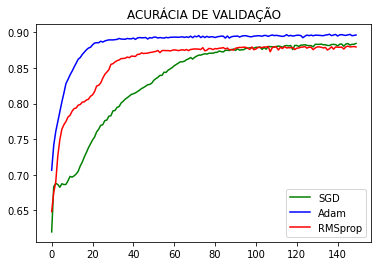

In [ ]:
plt.title('ACURÁCIA DE VALIDAÇÃO')
plt.plot(history_sgd.history['val_accuracy'], label='SGD',color='green')
plt.plot(history_adam.history['val_accuracy'], label='Adam',color='blue')
plt.plot(history_rmsprop.history['val_accuracy'], label='RMSprop',color='red')
plt.legend()
plt.show()